In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

### importing abuse report data

In [2]:
data = pd.read_csv("merge_result.csv")
data.head(20)

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544164/,lrz_security,17488
3,3,544162,9/17/2020 10:10,http://115.98.145.51:60363/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544162/,lrz_security,17488
4,4,544161,9/17/2020 10:10,http://115.97.80.186:42284/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544161/,lrz_security,17488
5,5,544160,9/17/2020 10:10,http://115.98.102.230:45653/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544160/,lrz_security,17488
6,6,544159,9/17/2020 10:09,http://115.97.196.195:48233/Mozi.a,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544159/,lrz_security,17488
7,7,544158,9/17/2020 10:09,http://115.97.31.62:41424/Mozi.a,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544158/,lrz_security,17488
8,8,544157,9/17/2020 10:09,http://achar24.com/wp-admin/lm/,online,malware_download,"emotet,heodo",https://urlhaus.abuse.ch/url/544157/,spamhaus,24940
9,9,544155,9/17/2020 10:09,http://115.97.64.174:45095/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544155/,lrz_security,17488


### exploding the data, per malware tag

In [3]:
exploded_data=data.assign(tags=data.tags.str.split(",")).explode('tags')
exploded_data.head()

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488


In [4]:
#the length of exploded data
len(exploded_data)

265196

In [5]:
#the occurrence of tags
exploded_data['tags'].value_counts()

elf        89369
Mozi       53709
32-bit     35483
mips       34233
exe         6727
           ...  
 excel         1
anubis         1
Dinihou        1
gz             1
opnedir        1
Name: tags, Length: 197, dtype: int64

### importing the reactspeed per country data

In [6]:
reactspeed = pd.read_csv("reactspeedURLhaus_inminutes.csv")
reactspeed.head()

,rank,AS_Number,Name,Country,Online,Offline,months,days,hours,minutes,total_in_minutes
0,1,52715,SCORPION TELECOMUNICACAO RIBEIRAO PR ...,BR,0,1,0,0,0,3,3
1,2,13022,STREAMS_GMBH,AT,0,1,0,0,0,5,5
2,3,22438,CLEAR-RATE-COMMUNICATIONS,US,0,1,0,0,0,7,7
3,4,137344,IDNIC-TRANSTEKNO-AS-ID PT. TRANS NAS ...,ID,0,1,0,0,0,7,7
4,5,17716,NTU-TW National Taiwan University,TW,0,1,0,0,0,8,8


## Reactspeed metrics
### Average reaction time per country

In [7]:
countries_and_sum_reactiontime = {}
for index, row in reactspeed.iterrows():
    country_code = row['Country']
    minutes_to_add = row['total_in_minutes']
    if country_code in countries_and_sum_reactiontime:
        minutes_so_far, counts_so_far = countries_and_sum_reactiontime[country_code]
        countries_and_sum_reactiontime[country_code] = (minutes_so_far + minutes_to_add), (counts_so_far + 1)
    else:
        countries_and_sum_reactiontime[country_code] = minutes_to_add, 1

sum_reaction_time = 0
for country in countries_and_sum_reactiontime.keys():
    minutes, counts = countries_and_sum_reactiontime[country]
    reaction_time_per_country = int(minutes / counts)
    countries_and_sum_reactiontime[country] = reaction_time_per_country
    sum_reaction_time = sum_reaction_time + reaction_time_per_country
print(countries_and_sum_reactiontime)

{'BR': 37629, 'AT': 26164, 'US': 48719, 'ID': 47830, 'TW': 85361, 'GB': 21341, 'IN': 36643, 'UA': 69163, 'ES': 39540, 'RU': 60343, 'PL': 67887, 'EE': 10721, 'CN': 148326, 'LB': 40810, 'CA': 31346, 'DE': 25689, 'FR': 24064, 'TR': 38740, 'GE': 112088, 'PK': 53799, 'DK': 64316, 'NL': 22283, 'IT': 22245, 'BD': 82675, 'HK': 34361, 'GR': 11448, 'HU': 80743, 'VU': 36, 'SI': 18722, 'AU': 34194, 'LV': 9025, 'MZ': 694, 'SD': 39, 'IR': 47648, 'MY': 21787, 'AM': 120297, 'MA': 1021, 'JP': 72931, 'CG': 1514, 'SE': 41793, 'PT': 11333, 'AR': 44259, 'BY': 46197, 'ZA': 57874, 'OM': 84, 'RS': 47740, 'RO': 51233, 'TH': 50446, 'PS': 107669, 'SG': 35441, 'KZ': 74771, 'PR': 24175, 'FI': 30735, 'IS': 10601, 'NO': 91807, 'MD': 31536, 'CZ': 56811, 'IE': 18770, 'NZ': 36560, 'BG': 75845, 'MM': 33856, 'VN': 33377, 'NC': 238, 'CL': 44429, 'KH': 99383, 'MX': 75808, 'CH': 25846, 'TT': 391, 'IL': 57280, 'PH': 36625, 'KR': 89989, 'DZ': 576, 'KG': 13304, 'JO': 40026, 'NP': 144347, 'LT': 61130, 'MW': 452, 'BA': 65834, 'K

In [8]:
### Median reaction time

In [9]:
median = int(sum_reaction_time / len(countries_and_sum_reactiontime))
median

71298

In [10]:
### Number of malware URLs per network

In [11]:
networks_and_sum_malware = {}
total_count = 0
for index, row in reactspeed.iterrows():
    as_number = row['AS_Number']
    online_count = row['Online']
    offline_count = row['Offline']
    combined_count = online_count + offline_count
    total_count = total_count + combined_count
    if as_number in networks_and_sum_malware:
        counts_so_far = networks_and_sum_malware[as_number]
        networks_and_sum_malware[as_number] = counts_so_far + combined_count
    else:
        networks_and_sum_malware[as_number] = combined_count

print(networks_and_sum_malware)

{'52715': 1, '13022': 1, '22438': 1, '137344': 1, '17716': 1, '34243': 1, '58966': 1, '52602': 1, '6789': 1, '46652': 4, '16912': 1, '43578': 1, '42676': 1, '52078': 1, '7024': 1, '266214': 1, '8728': 1, '263891': 1, '56977': 1, '17739': 1, '13536': 1, '42334': 2, '133699': 1, '29953': 1, '202040': 1, '270972': 1, '20926': 1, '263089': 1, '139526': 1, '12296': 1, '35266': 2, '268072': 6, '270668': 2, '262872': 1, '16101': 1, '202223': 1, '139879': 1, '138225': 1, '29100': 1, '14173': 1, '3800': 1, '204983': 1, '268248': 1, '268922': 1, '136704': 9, '2639': 8, '44512': 1, '201602': 1, '58715': 1, '38186': 3, '31224': 1, '197495': 1, '52786': 1, '60819': 1, '270828': 2, '270295': 1, '196865': 1, '266186': 12, '59671': 1, '136665': 2, '134884': 1, '135825': 1, '270609': 1, '56783': 2, '270310': 10, '61818': 1, '267278': 1, '53154': 3, '47902': 1, '8278': 1, '269267': 1, '34568': 1, '51275': 1, '137655': 3, '135253': 2, '21570': 1, '25071': 1, '9249': 4, '47409': 2, '43061': 1, '32987': 1,

In [12]:
### Average number of malware URLs per network

In [13]:
print(total_count / len(networks_and_sum_malware))

92.28277581549969


### Number of malware URLs per country

In [14]:
countries_and_sum_urls = {}
total_count = 0
for index, row in reactspeed.iterrows():
    country_code = row['Country']
    online_count = row['Online']
    offline_count = row['Offline']
    combined_count = online_count + offline_count
    total_count = total_count + combined_count
    if country_code in countries_and_sum_urls:
        count_so_far = countries_and_sum_urls[country_code]
        countries_and_sum_urls[country_code] = count_so_far + combined_count
    else:
        countries_and_sum_urls[country_code] = combined_count

print(countries_and_sum_urls)

{'BR': 5367, 'AT': 177, 'US': 155472, 'ID': 2136, 'TW': 1483, 'GB': 4603, 'IN': 86436, 'UA': 3075, 'ES': 1648, 'RU': 16896, 'PL': 2693, 'EE': 3067, 'CN': 40651, 'LB': 5, 'CA': 3834, 'DE': 18656, 'FR': 14177, 'TR': 4275, 'GE': 1798, 'PK': 75, 'DK': 673, 'NL': 15992, 'IT': 3626, 'BD': 206, 'HK': 1927, 'GR': 257, 'HU': 3248, 'VU': 4, 'SI': 123, 'AU': 1225, 'LV': 554, 'MZ': 2, 'SD': 1, 'IR': 3937, 'MY': 1110, 'AM': 17, 'MA': 36, 'JP': 4614, 'CG': 2, 'SE': 474, 'PT': 794, 'AR': 531, 'BY': 408, 'ZA': 988, 'OM': 2, 'RS': 284, 'RO': 3860, 'TH': 2030, 'PS': 26, 'SG': 4983, 'KZ': 483, 'PR': 9, 'FI': 249, 'IS': 268, 'NO': 174, 'MD': 907, 'CZ': 818, 'IE': 80, 'NZ': 207, 'BG': 1404, 'MM': 3, 'VN': 5159, 'NC': 2, 'CL': 638, 'KH': 113, 'MX': 358, 'CH': 637, 'TT': 3, 'IL': 548, 'PH': 94, 'KR': 3314, 'DZ': 26, 'KG': 75, 'JO': 20, 'NP': 37, 'LT': 730, 'MW': 2, 'BA': 29, 'KW': 21, 'BE': 137, 'VE': 73, 'SK': 444, 'AZ': 13, 'YE': 1, 'AL': 38, 'BS': 5, 'PF': 2, 'TJ': 10, 'GN': 7, 'HR': 94, 'NG': 159, 'LU': 

In [15]:
### Average number of malware URLs per country

In [16]:
print(total_count / len(countries_and_sum_urls))

2793.4402515723273


### merging the abuse report with the reactspeed data, to get the country of each report

In [17]:
data_withcountry=pd.merge(data,reactspeed,on="AS_Number",how="left")
data_withcountry.head()

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number,rank,Name,Country,Online,Offline,months,days,hours,minutes,total_in_minutes
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544163/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544164/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
3,3,544162,9/17/2020 10:10,http://115.98.145.51:60363/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544162/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
4,4,544161,9/17/2020 10:10,http://115.97.80.186:42284/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544161/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0


checking the occurrence of attack per country (not normalized yet!!!)

In [30]:
data_withcountry['Country'].value_counts()

IN    65268
CN     8117
DE     4909
US     3072
BR      642
      ...  
SD        1
LV        1
BA        1
LY        1
MZ        1
Name: Country, Length: 95, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[[ 3.11656864e-01 -1.16971944e-03]
 [-4.71606774e-02  3.38422642e-04]
 [ 1.55124450e-01 -1.14313912e-03]
 [ 5.48070657e-01 -1.15690129e-03]
 [ 2.53698022e-02 -7.38862125e-04]]


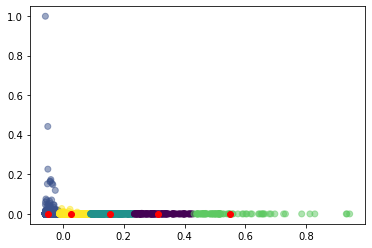

In [60]:
# Attempt at clustering
# Try best number of clusters

data_for_clustering = reactspeed[['Online', 'Offline', 'total_in_minutes']]
data_for_clustering.loc[:, 'count_urls'] = data_for_clustering['Online'] + data_for_clustering['Offline']
data_for_clustering = data_for_clustering[['total_in_minutes', 'count_urls']]
df = data_for_clustering
df_norm = (df - df.mean()) / (df.max() - df.min())

kmeans = KMeans(n_clusters=5).fit(df_norm)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_norm['total_in_minutes'], df_norm['count_urls'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()